                                                 Problem Statement:
Creating a model which Predicts the weather, based on available data and checking the variations with the actual values.

In [1]:
#importing required libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
#importing dataset
tp= pd.read_csv(r'C:\Users\SREEDHAR\Documents\Data science\ML projects\temperature.csv')
tp.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [3]:
tp.shape

(7752, 25)

In [4]:
tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
#checking for null values
tp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<AxesSubplot:>

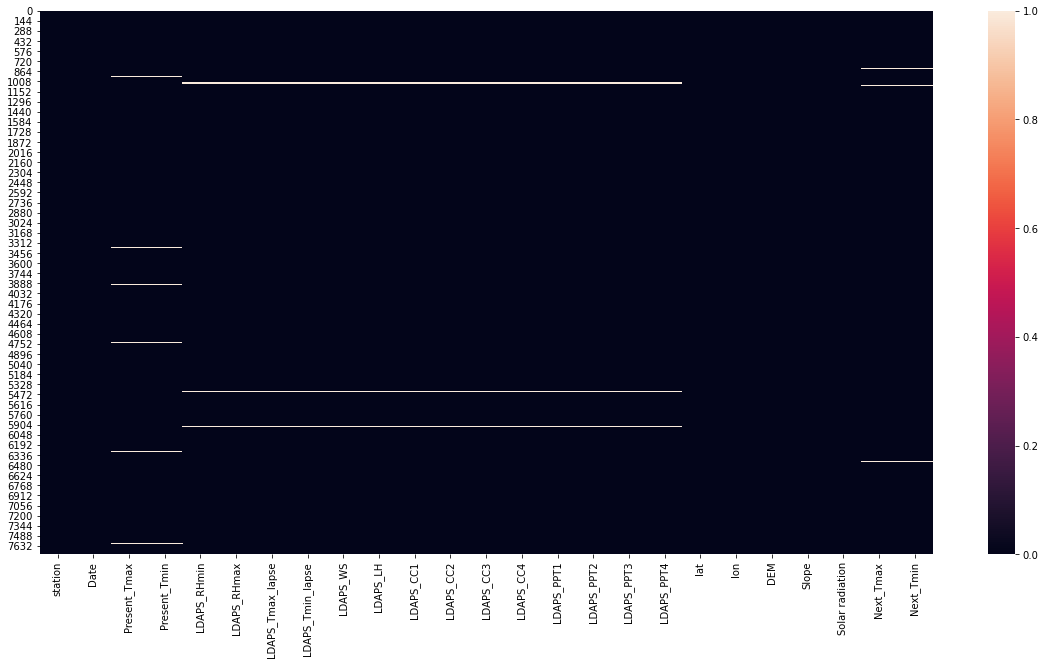

In [6]:
#heatmap for null values
plt.figure(figsize= (20,10))
sns.heatmap(tp.isnull())

20 columns out of 25 contain null values. 

In [7]:
tp.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    45.963543    84.222862   
50%      13.000000     29.900000     23.400000    55.039024    89.793480   
75%      19.000000     32.000000     24.900000    67.190056    93.743629   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7677.000000       7677.000000  7677.000000  7677.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.947191          2.345347     2.183836    33.730589   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673499         22.089739     5.678705    37.266753   
50%           29.703426         23.760199     6.547470    56.865482   
75%           31.710450         25.152909     8.032276    84.223616   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7677.000000  7677.000000  7677.000000  7677.000000  7677.000000   
mean      0.368774     0.356080     0.318404     0.299191     0.591995   
std       0.262458     0.258061     0.250362     0.254348     1.945768   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146654     0.140615     0.101388     0.081532     0.000000   
50%       0.315697     0.312421     0.262555     0.227664     0.000000   
75%       0.575489     0.558694     0.496703     0.499489     0.052525   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat          lon  \
count  7677.000000  7677.000000  7677.000000  7752.000000  7752.000000   
mean      0.485003     0.278200     0.269407    37.544722   126.991397   
std       1.762807     1.161809     1.206214     0.050352     0.079435   
min       0.000000     0.000000     0.000000    37.456200   126.826000   
25%       0.000000     0.000000     0.000000    37.510200   126.937000   
50%       0.000000     0.000000     0.000000    37.550700   126.995000   
75%       0.018364     0.007896     0.000041    37.577600   127.042000   
max      21.621661    15.841235    16.655469    37.645000   127.135000   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  
count  7752.000000  7752.000000      7752.000000  7725.000000  7725.000000  
mean     61.867972     1.257048      5341.502803    30.274887    22.932220  
std      54.279780     1.370444       429.158867     3.128010     2.487613  
min      12.370000     0.098475      4329.520508    17.400000    11.300000  
25%      28.700000     0.271300      4999.018555    28.200000    21.300000  
50%      45.716000     0.618000      5436.345215    30.500000    23.100000  
75%      59.832400     1.767800      5728.316406    32.600000    24.600000  
max     212.335000     5.178230      5992.895996    38.900000    29.800000

#Treating Nan Values
#Nan Values are less than 0.01 percent,hence they can be dropped, but here we will try to fill these values using Mean or median.Since data is ordinal type, it is best way to do. lets check for Nan values and fill them.

In [8]:
tp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

2 values each, are missing in station and in data.
Nan is present at 7750 and 7751 indexes, data is collected from all stations, so after 25th index, count will start from beginning. so 7750 index will be the 1st station and 7751 will be the 2nd station.

In [9]:
# Fillign Nan in station column 
tp['station'].iloc[7750]=1.0 
tp['station'].iloc[7751]=2.0

In [10]:
# Filling date column
tp['Date'].iloc[7750]= '31-08-2017'
tp['Date'].iloc[7751]= '31-08-2017'

In [11]:
# Filling rest of the values using median of the column
for col in tp.columns:
    if col not in ['station', 'Date']:
        tp[col]=tp[col].replace(np.nan, tp[col].median())

In [12]:
#checking for null values again
tp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

no null values anymore. Date column is object type. changing it to datatime stamp for more useful information

In [13]:
tp['Date']= pd.to_datetime(tp['Date'])

Data visualization
Univariate Analysis

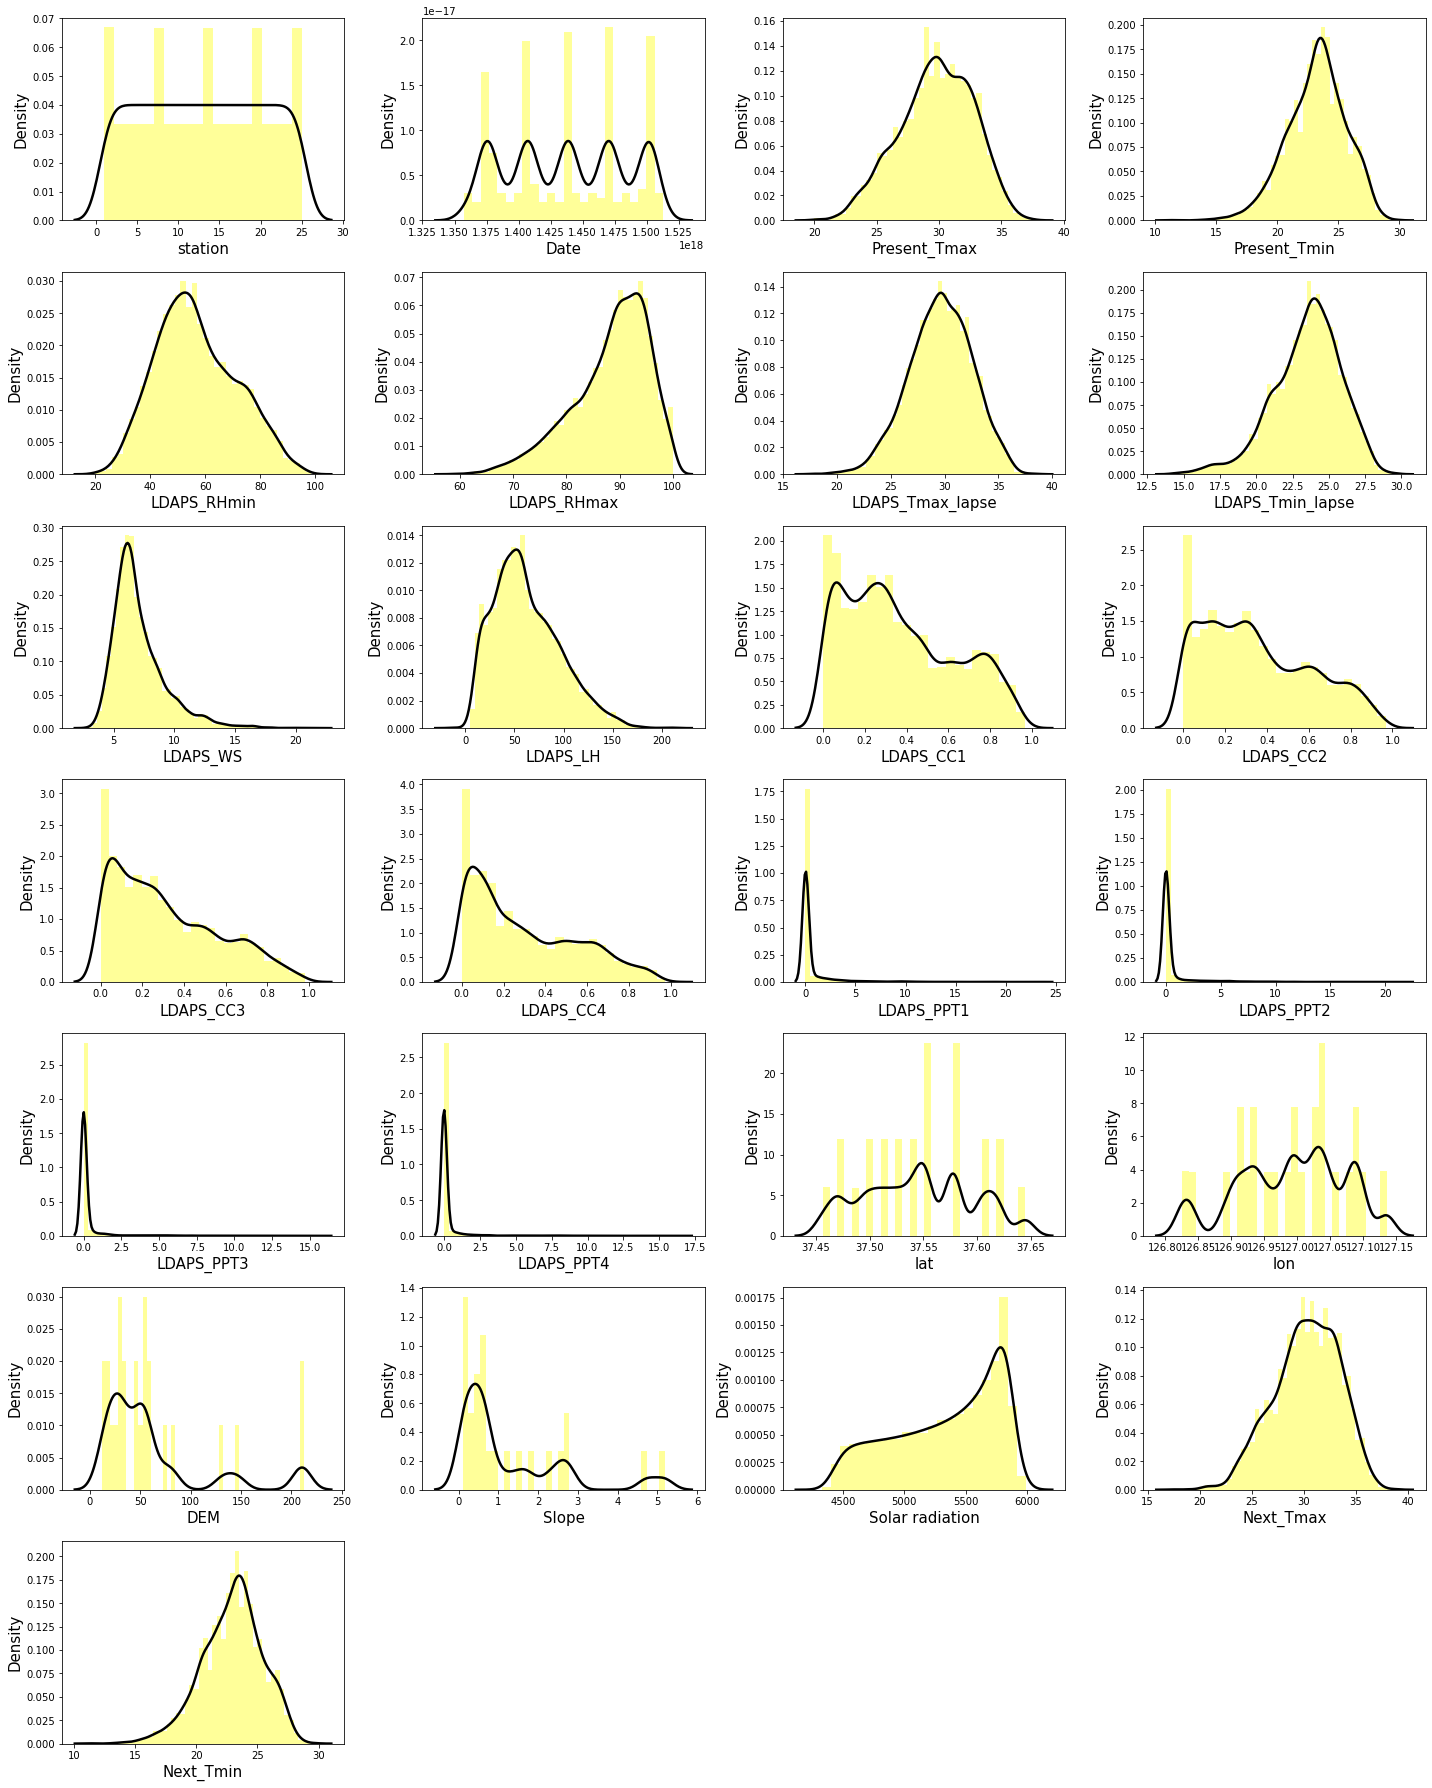

In [14]:
plt.figure(figsize=(20,35), facecolor='white')
plotnum= 1

for column in tp.columns:
    if plotnum<=26:
        ax= plt.subplot(10,4, plotnum)
        sns.distplot(tp[column], color='yellow',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 15)
        plt.ylabel('Density', fontsize= 15)
    plotnum+=1
plt.tight_layout()

In [15]:
tp['Slope'].value_counts()

0.514100    310
0.266100    310
1.231300    310
0.572100    310
2.785000    310
2.257900    310
5.178200    310
0.505500    310
0.222300    310
2.686500    310
0.133200    310
1.562900    310
0.155400    310
2.534800    310
0.145700    310
0.855200    310
0.098500    310
0.697000    310
0.593100    310
1.767800    310
0.412500    310
0.618000    310
0.271300    310
4.729600    310
0.623300    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

Text(0, 0.5, 'Counts')

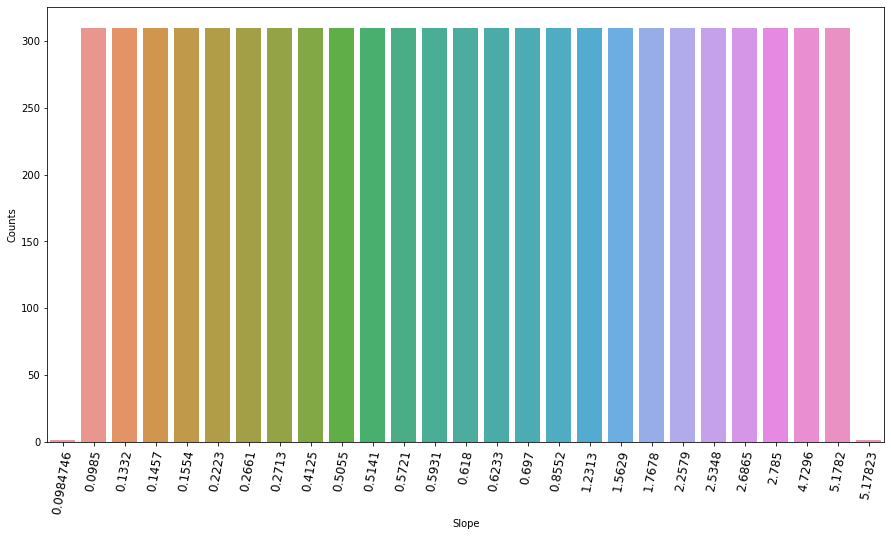

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='Slope',data=tp)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

2 slopes have one count each. All other slope values have equal counts

In [17]:
tp['DEM'].value_counts()

212.3350    311
12.3700     311
30.0464     310
82.2912     310
15.5876     310
45.7160     310
17.2956     310
52.5180     310
208.5070    310
54.6384     310
59.8324     310
132.1180    310
30.9680     310
33.3068     310
53.4712     310
50.9312     310
44.7624     310
19.5844     310
26.2980     310
75.0924     310
28.7000     310
56.4448     310
35.0380     310
146.5540    310
21.9668     310
Name: DEM, dtype: int64

Text(0, 0.5, 'Counts')

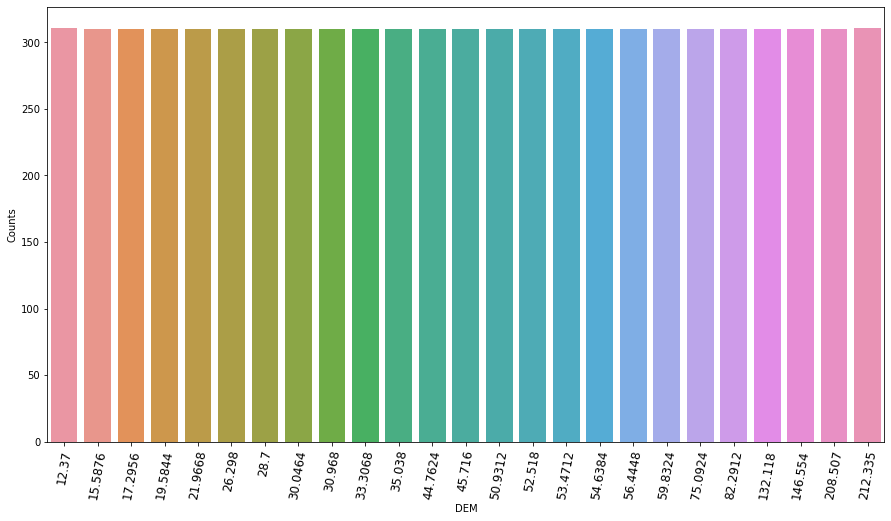

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEM',data=tp)
locs, labels = plt.xticks(fontsize= 12)
plt.setp(labels, rotation=80)
plt.ylabel('Counts')

All the elevations have same count as 310. 2 elevations have 311 counts each

Bivariate Analysis
Here we will analyse data against the target column.

Lets analyse the graphs between date and in target columns. we can use line plot for numerical to numerical data visualization.

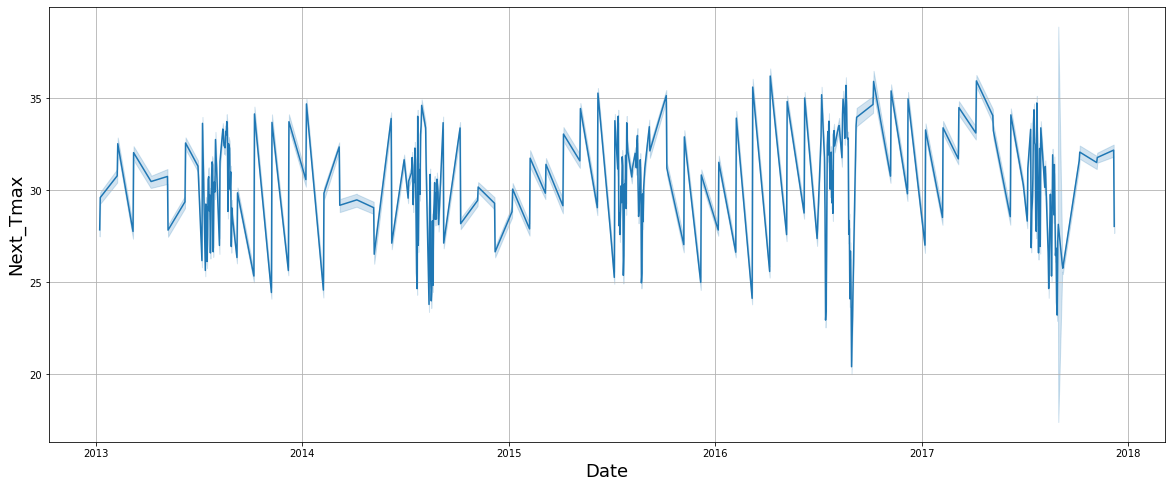

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Next_Tmax', data= tp )
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Next_Tmax', fontsize= 18)
plt.grid(True)
plt.show()

In [20]:
#Next_Tmax is maximum between 2017-2018 and it is minimum between 2016-2017.

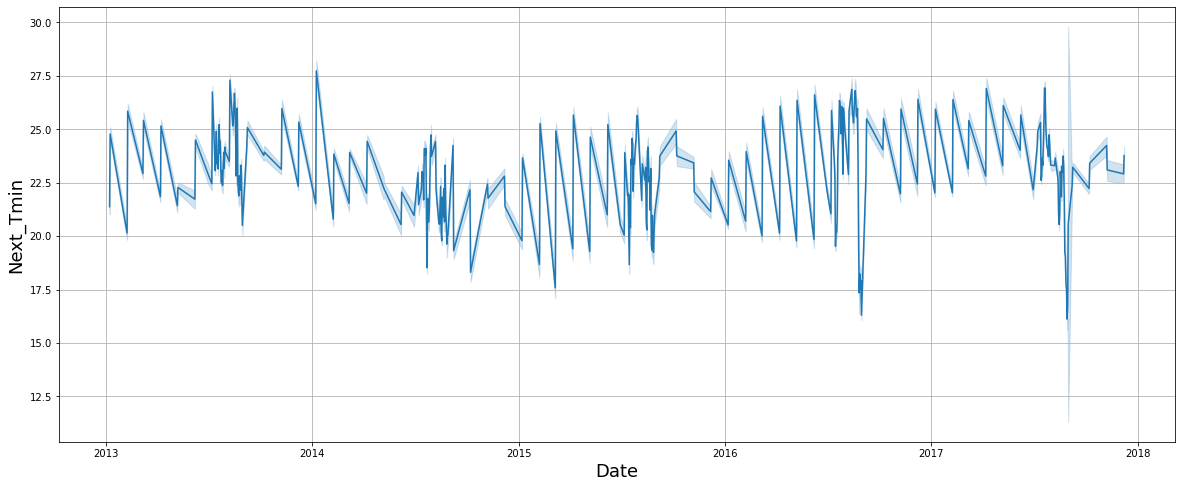

In [21]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Next_Tmin', data= tp )
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Next_Tmin', fontsize= 18)
plt.grid(True)
plt.show()

In [22]:
# Next_Tmin is maximum in the beginning of 2014 and it's minimum between 2017-2018.

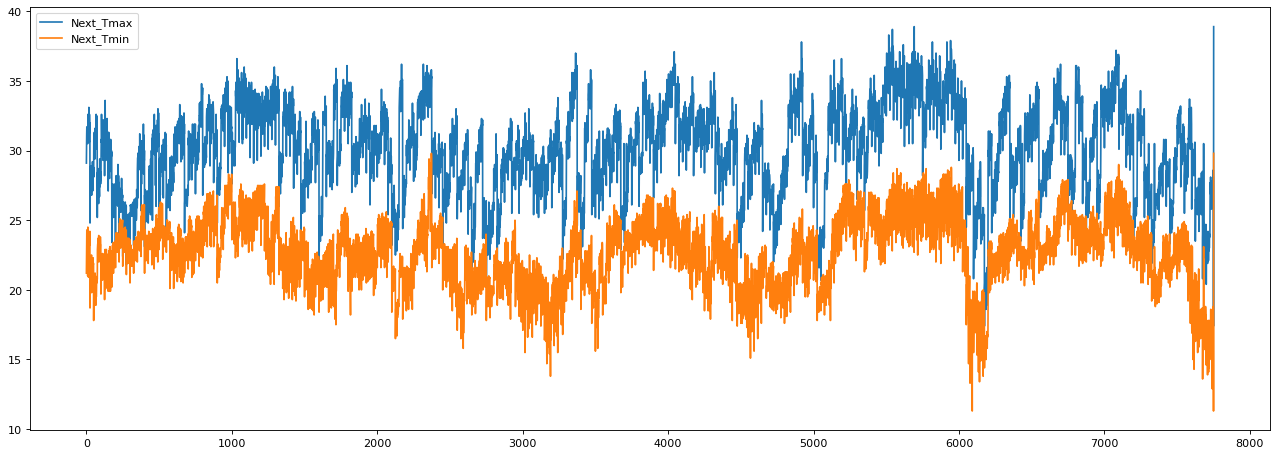

In [23]:
plt.figure(figsize=(20, 7), dpi=80)
plt.plot(tp["Next_Tmax"],label="Next_Tmax")
plt.plot(tp["Next_Tmin"],label="Next_Tmin")
plt.legend()
plt.show()

In [24]:
# Next_tmin and Next_tmax both showing almost equal kind of pattern

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

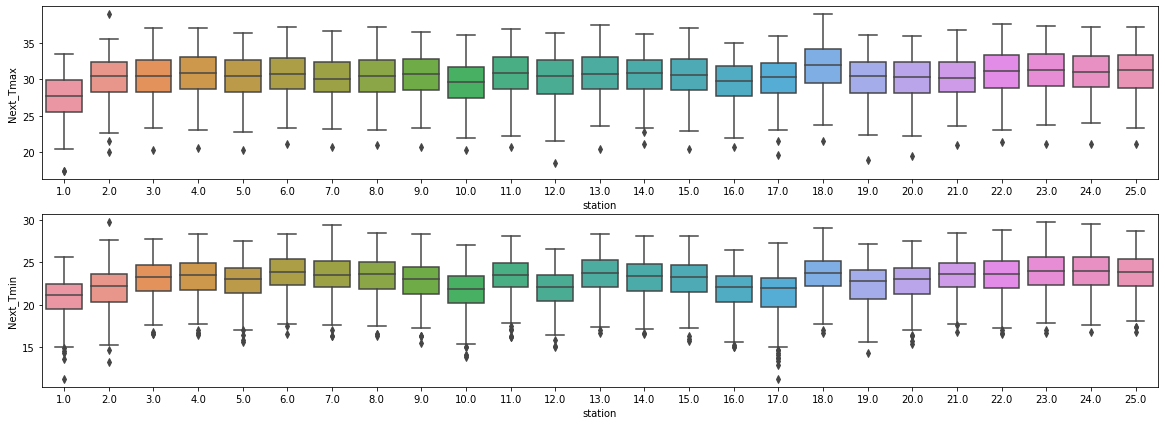

In [25]:
#Plotting wrt to station
plt.figure(figsize=(20,7))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=tp)

plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=tp)

In [26]:
#Tmax and Tmin is maximum at station 18 and it's minimun at station 1

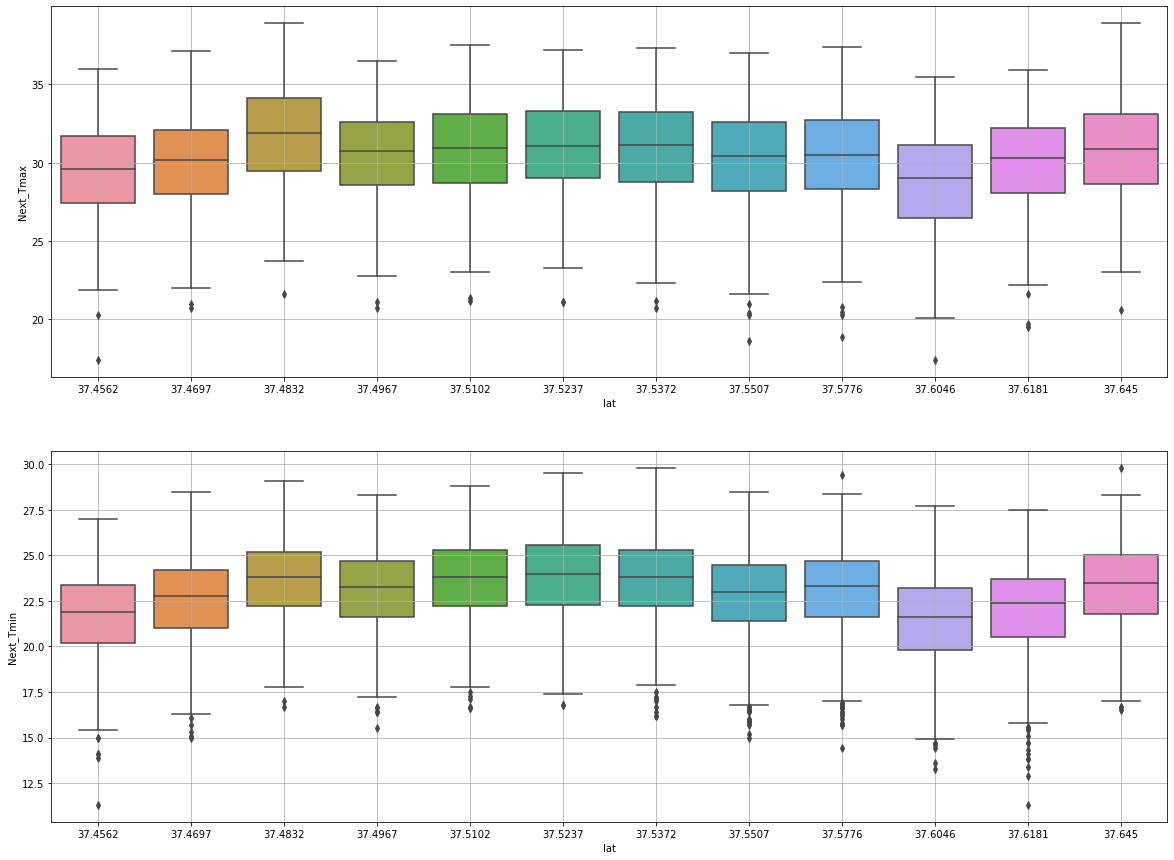

In [27]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=tp)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=tp)
plt.grid(True)

In [28]:
#Next_Tmax increases with the increase in the latitude and this is inverse for Next_Tmin

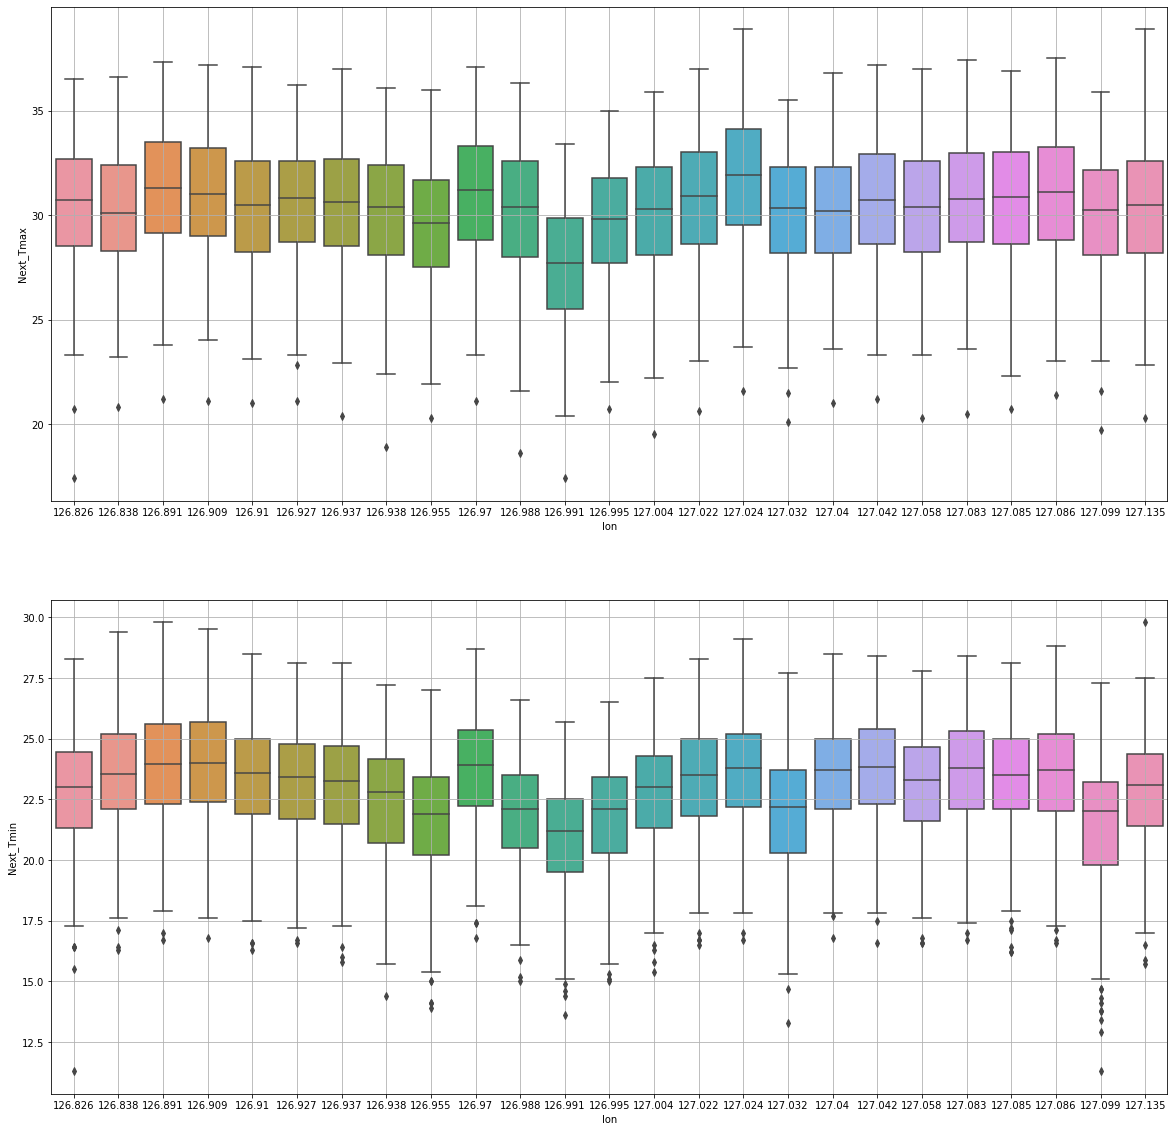

In [29]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=tp)
plt.grid(True)
plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=tp)
plt.grid(True)

In [30]:
#There is no direct relationship between the temperature and Longitude.

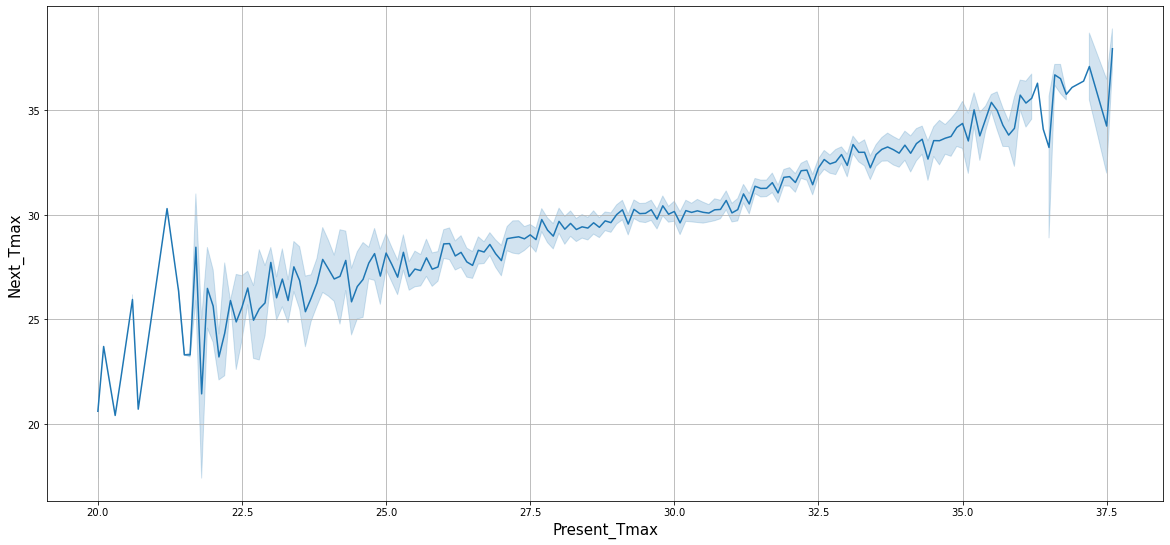

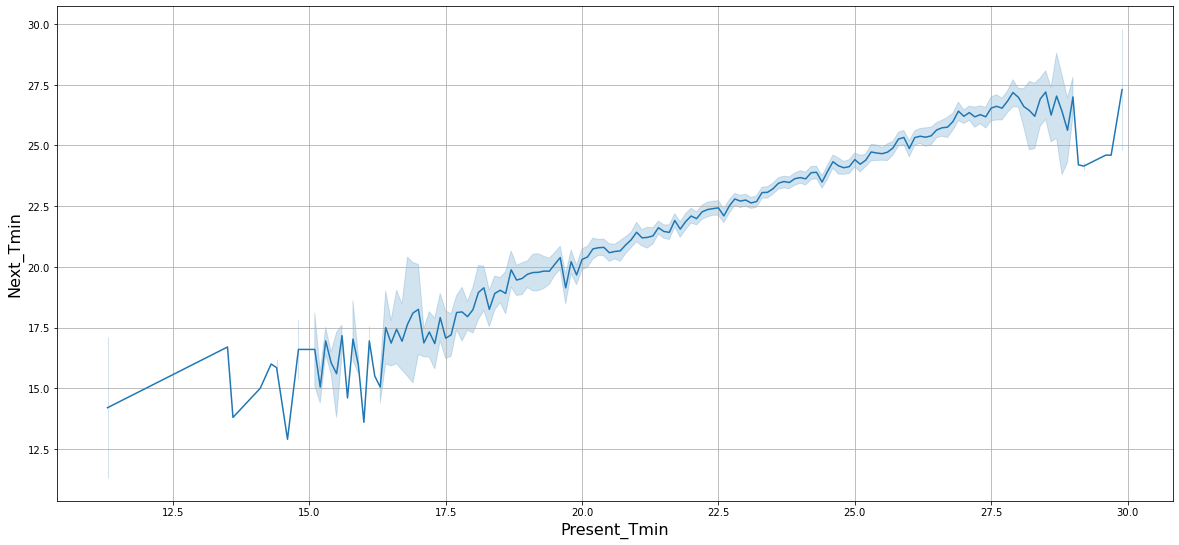

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='Present_Tmax', y='Next_Tmax', data= tp )
plt.xlabel('Present_Tmax', fontsize= 15)
plt.ylabel('Next_Tmax', fontsize= 15)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='Present_Tmin', y='Next_Tmin', data= tp )
plt.xlabel('Present_Tmin', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [32]:
#there is a linear relationship between  Next Tmin and Tmax

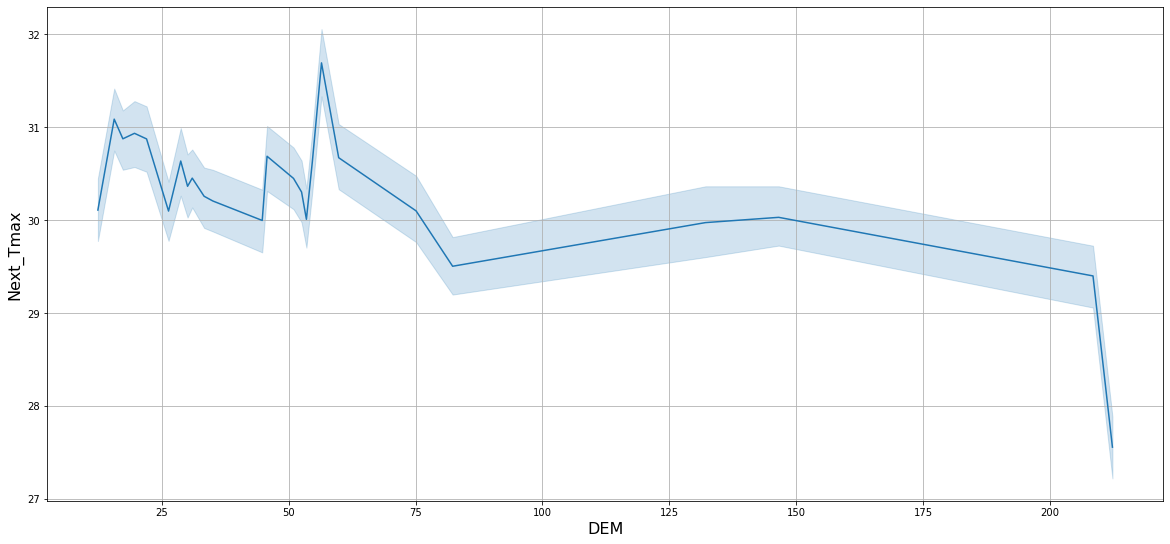

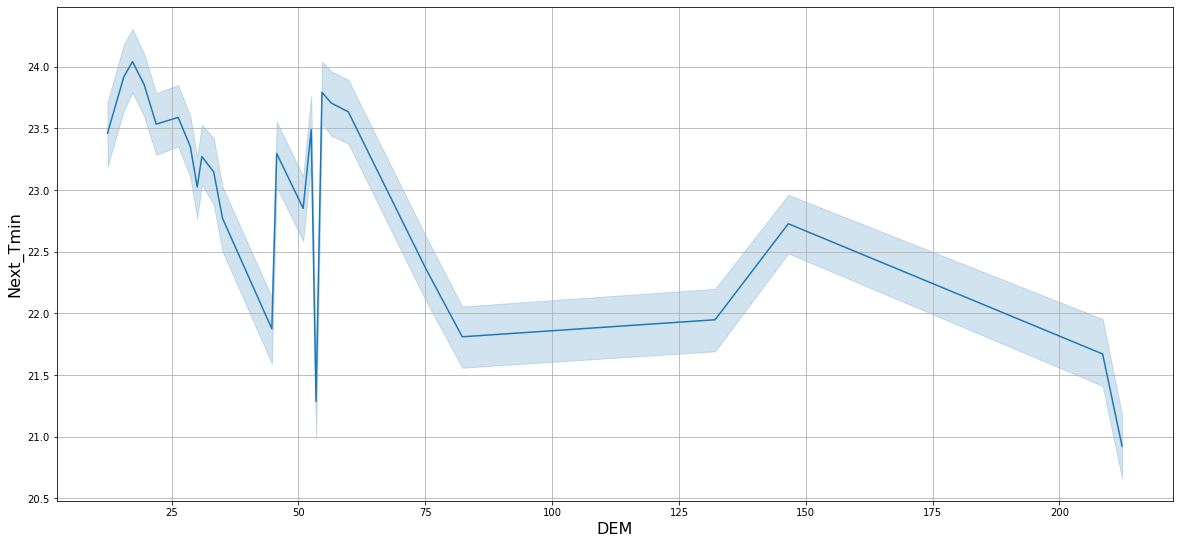

In [33]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='DEM', y='Next_Tmax', data= tp )
plt.xlabel('DEM', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='DEM', y='Next_Tmin', data= tp )
plt.xlabel('DEM', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [34]:
#with an increase in the elevation there is decrease in the Next_Tmin and Next_Tmax.

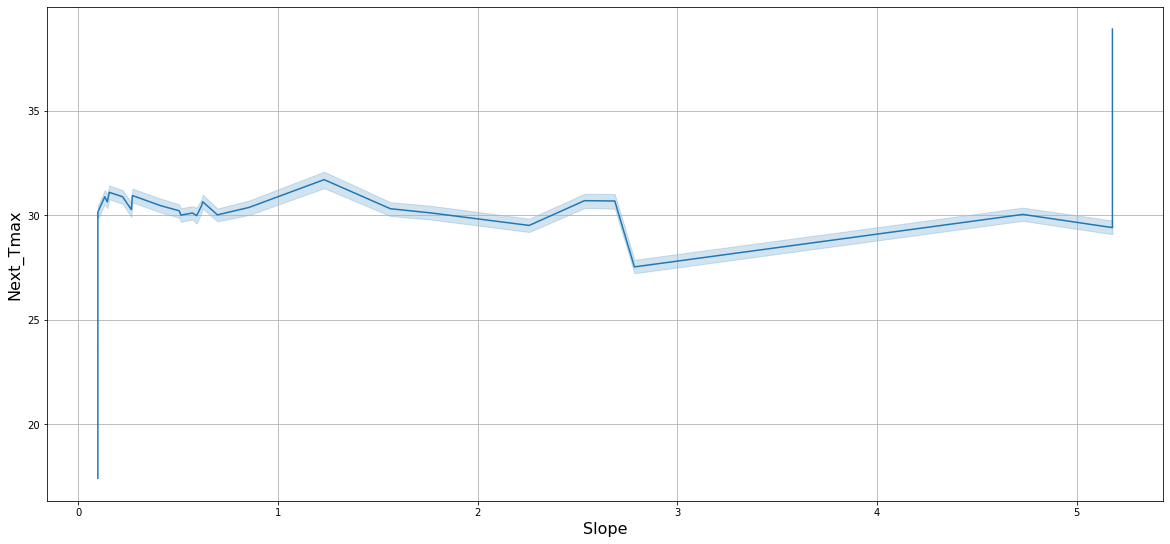

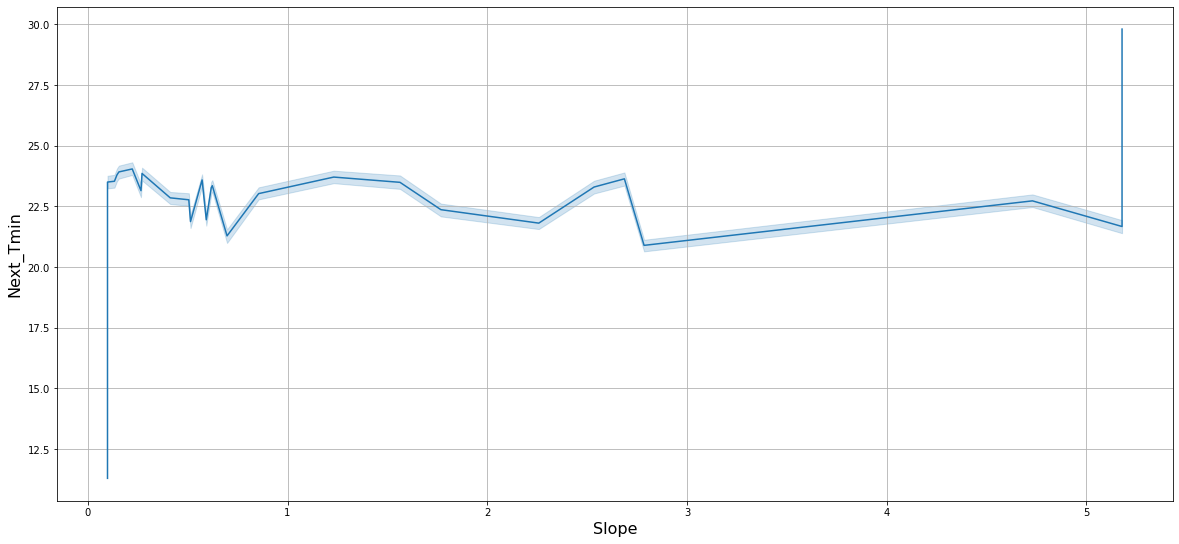

In [35]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.lineplot(x='Slope', y='Next_Tmax', data= tp )
plt.xlabel('Slope', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.lineplot(x='Slope', y='Next_Tmin', data= tp )
plt.xlabel('Slope', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [36]:
#Both the Temperatures showing same relation.It is almost constant but after 5 it is increasing

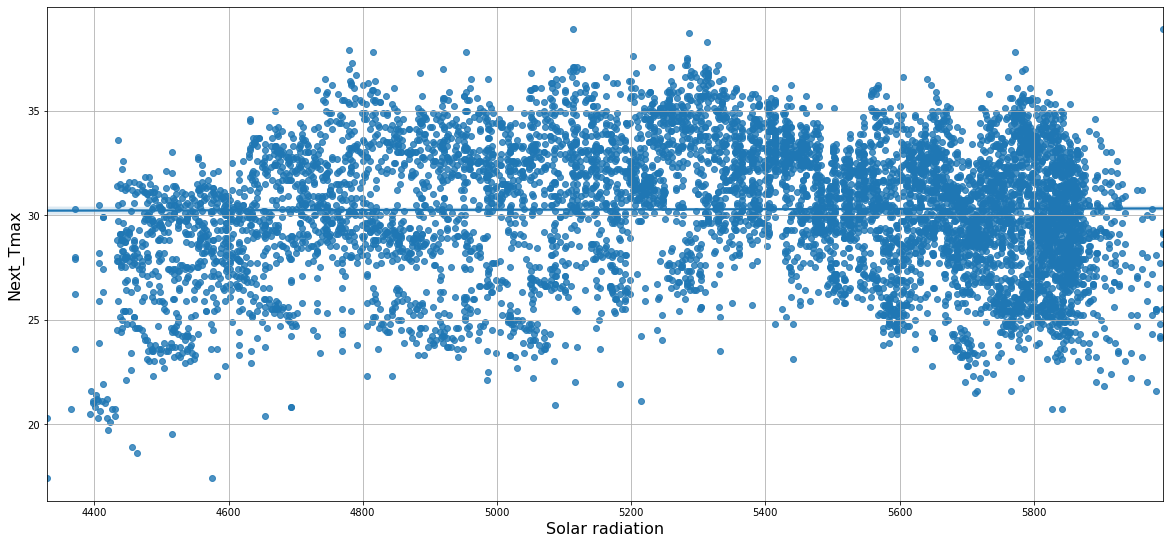

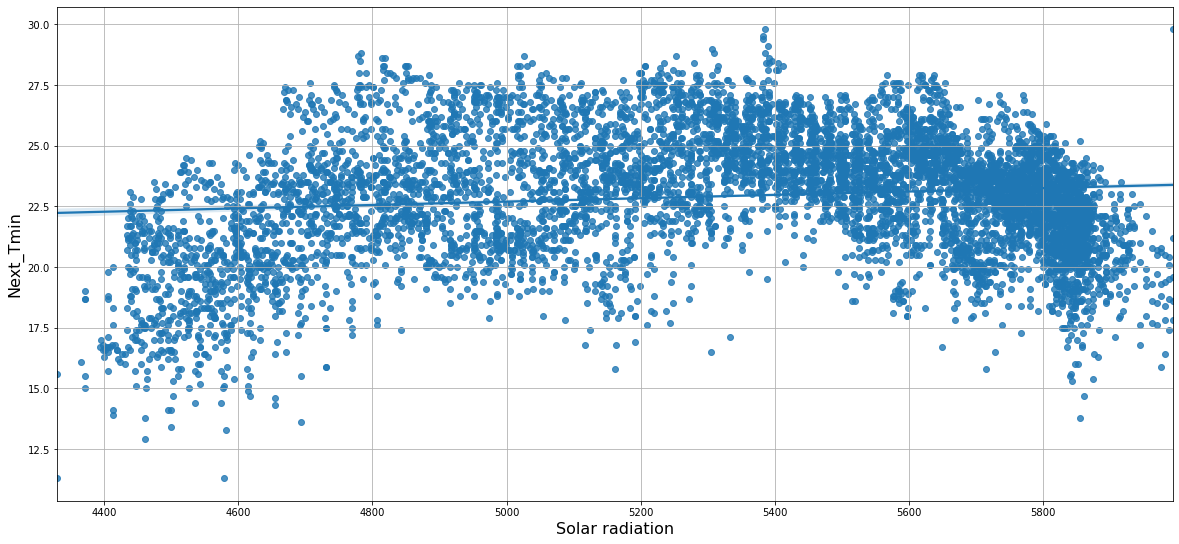

In [37]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='Solar radiation', y='Next_Tmax', data= tp )
plt.xlabel('Solar radiation', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='Solar radiation', y='Next_Tmin', data= tp )
plt.xlabel('Solar radiation', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [38]:
#relation between  solar radiation and temperature is seems to be strong but non linear relation

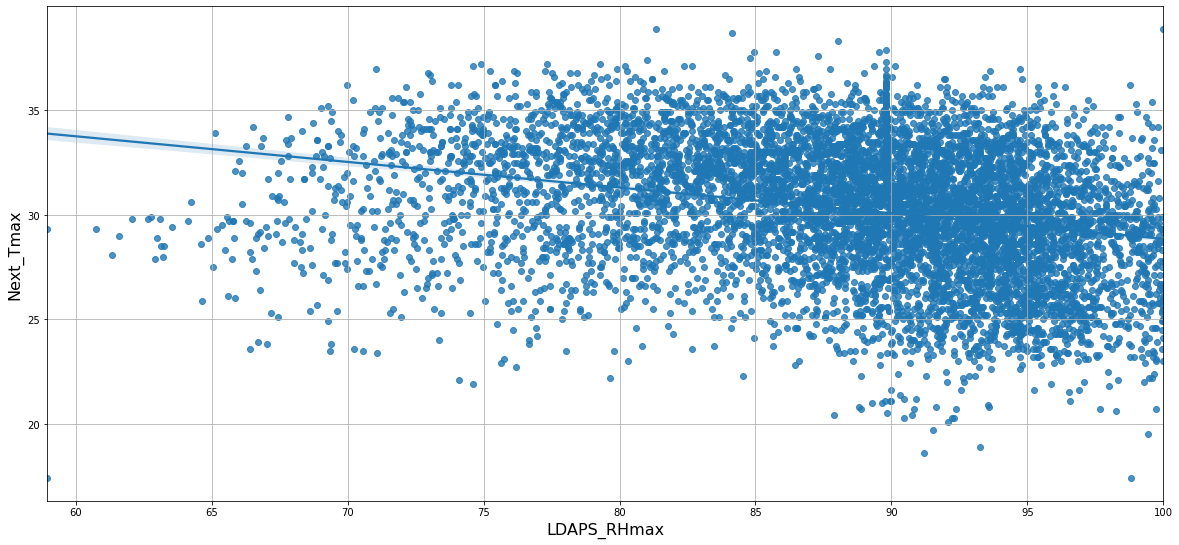

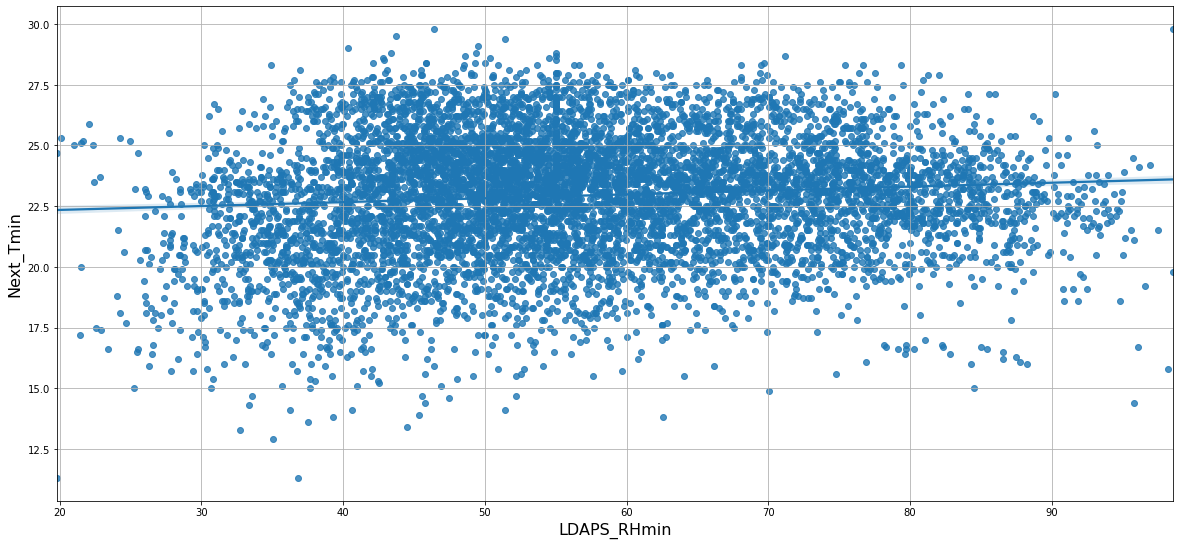

In [39]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_RHmax', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_RHmax', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_RHmin', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_RHmin', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [40]:
#moderately negative relationship 

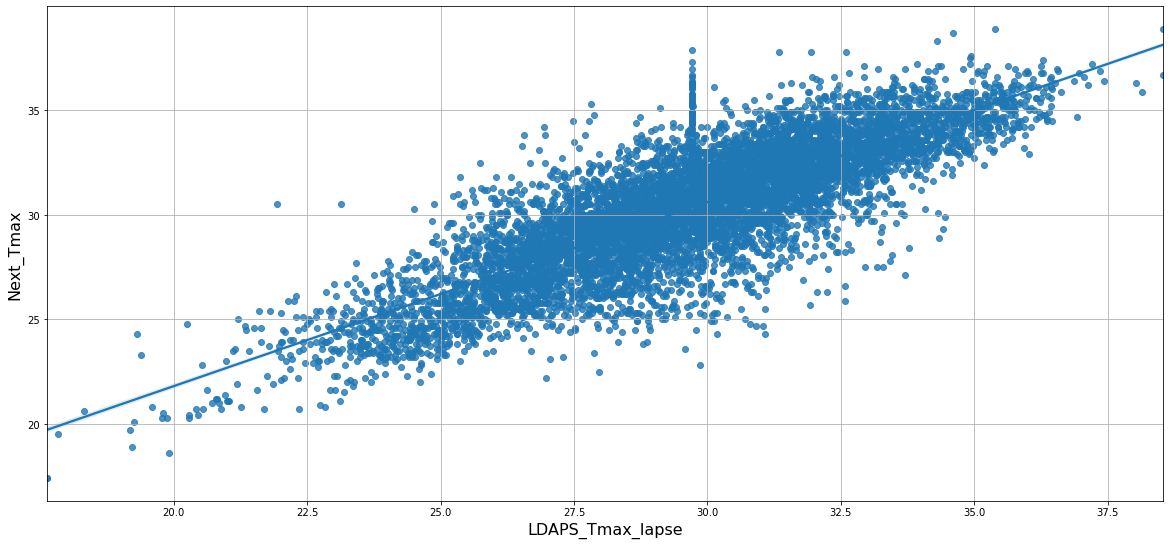

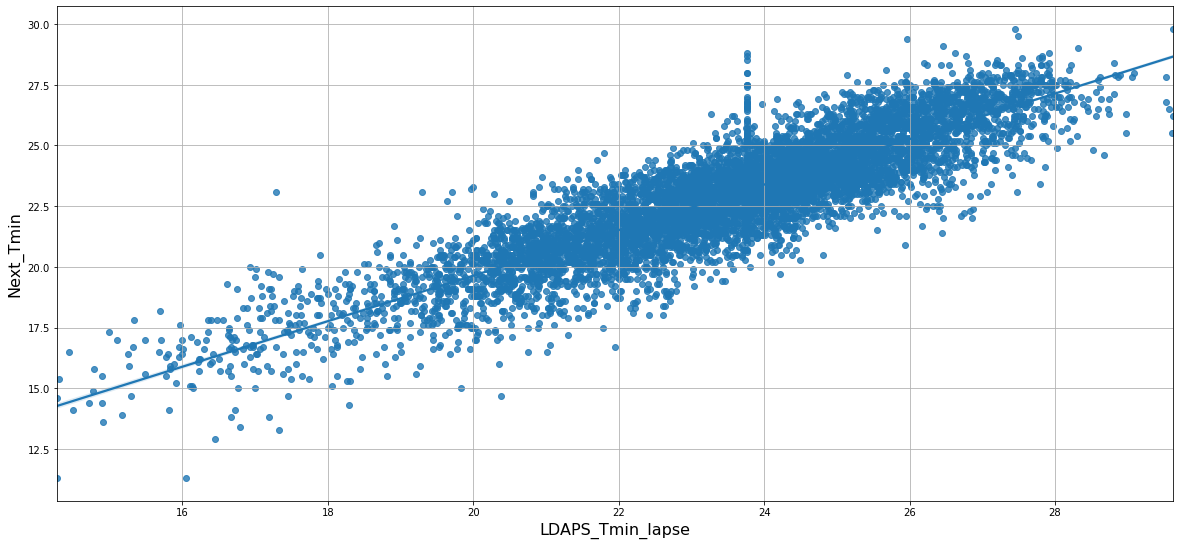

In [41]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.regplot(x='LDAPS_Tmax_lapse', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_Tmax_lapse', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)
plt.grid(True)
plt.show()

plt.figure(figsize=(20,20))
plt.subplot(2,1,2)
sns.regplot(x='LDAPS_Tmin_lapse', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_Tmin_lapse', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)
plt.grid(True)
plt.show()

In [42]:
 # seems to be a strong positive relationship betweem Air_temperature and Next day temperature. 

Text(0, 0.5, 'Next_Tmin')

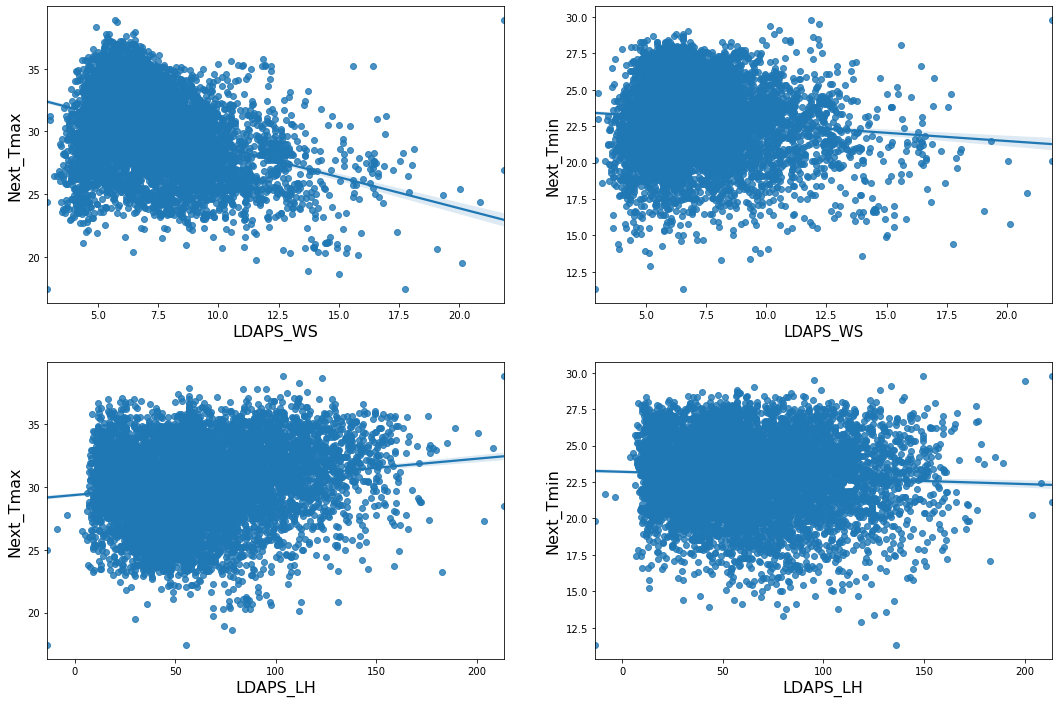

In [43]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_WS', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_WS', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(2,2,2)
sns.regplot(x='LDAPS_WS', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_WS', fontsize= 15)
plt.ylabel('Next_Tmin', fontsize= 15)



plt.subplot(2,2,3)
sns.regplot(x='LDAPS_LH', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_LH', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(2,2,4)
sns.regplot(x='LDAPS_LH', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_LH', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

Relationship between the latent heat and Next Day temperature.
there is a decrease in the temperature with increase of latent heat , in the last graph there is no relation with Latent heat and temperature.

Text(0, 0.5, 'Next_Tmin')

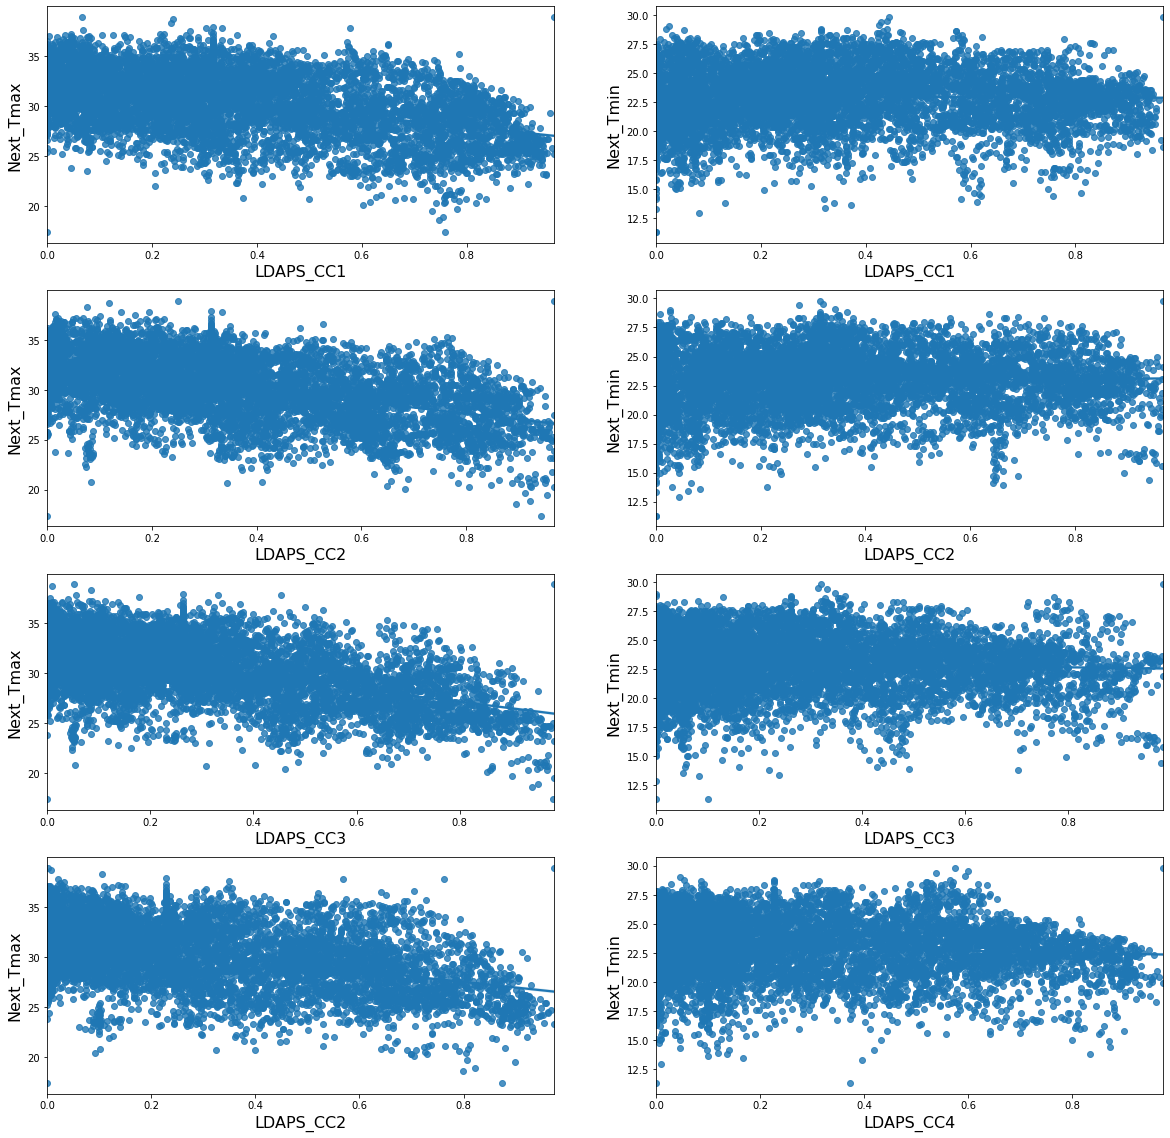

In [44]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_CC1', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_CC1', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_CC1', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_CC1', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_CC2', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_CC2', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_CC3', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_CC3', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_CC3', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_CC3', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_CC4', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_CC2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_CC4', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_CC4', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

Graphs doesnot show good relation between split average cloud cover and Next day temperature. There is a negative relation in few plots

Text(0, 0.5, 'Next_Tmin')

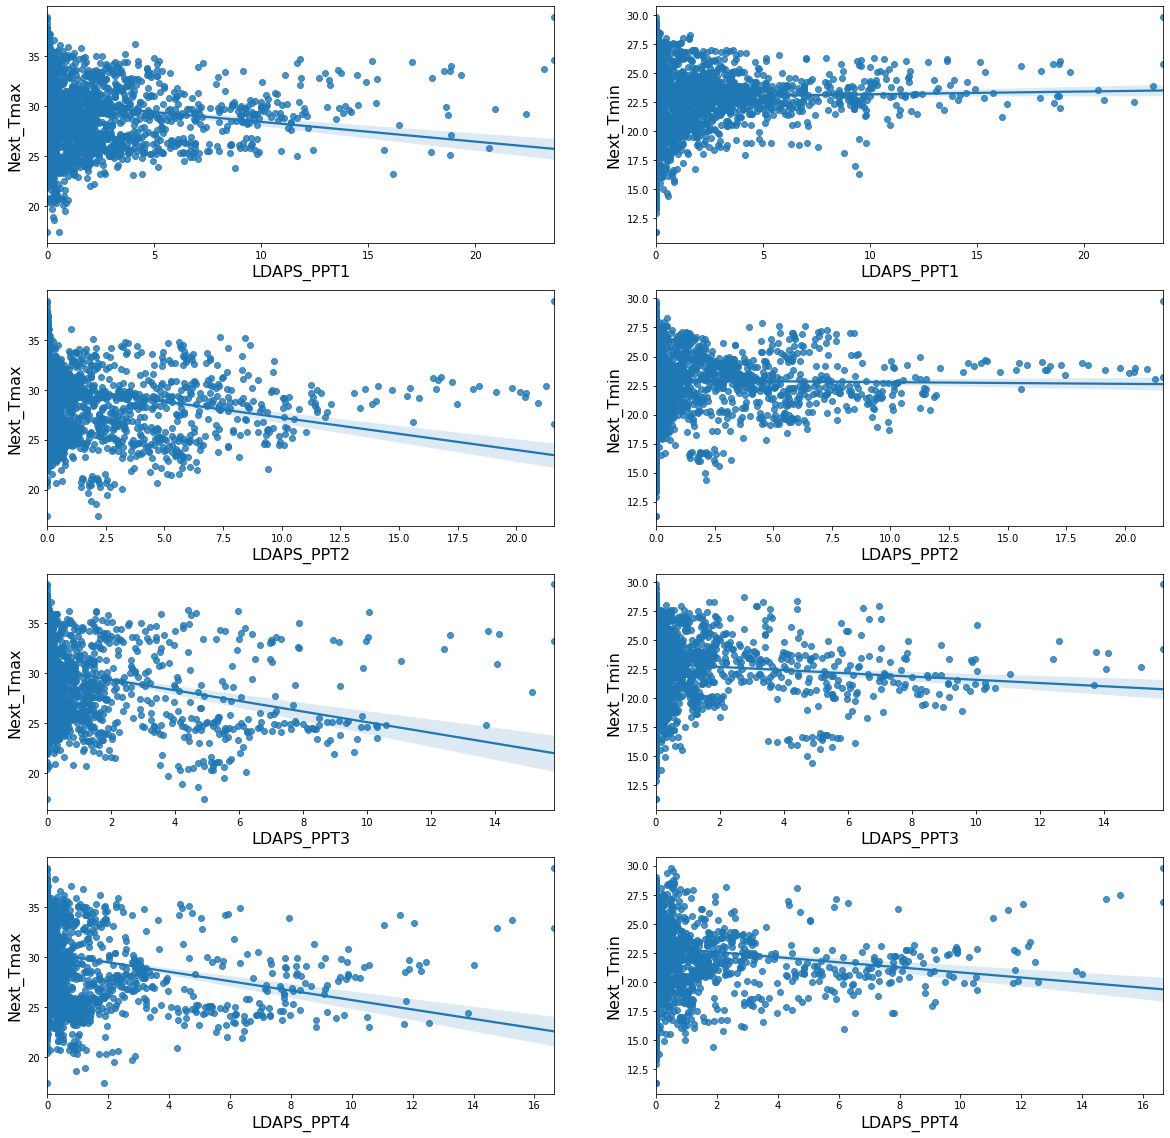

In [45]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_PPT1', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,2)
sns.regplot(x='LDAPS_PPT1', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_PPT1', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,3)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_PPT2', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,4)
sns.regplot(x='LDAPS_PPT2', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_PPT2', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)


plt.subplot(4,2,5)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_PPT3', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)


plt.subplot(4,2,6)
sns.regplot(x='LDAPS_PPT3', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_PPT3', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)



plt.subplot(4,2,7)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmax', data= tp )
plt.xlabel('LDAPS_PPT4', fontsize= 16)
plt.ylabel('Next_Tmax', fontsize= 16)



plt.subplot(4,2,8)
sns.regplot(x='LDAPS_PPT4', y='Next_Tmin', data= tp )
plt.xlabel('LDAPS_PPT4', fontsize= 16)
plt.ylabel('Next_Tmin', fontsize= 16)

There is a negative relation between split average precipitation and Temprature

Data Pre-processing

In [46]:
#dropping all the irrelevant columns: station,Date,lat,lon columns does not have any effect on temperature, hence dropping them
tp.drop(['station', 'Date', 'lat', 'lon'], axis= 1, inplace= True)

In [47]:
tp.shape

(7752, 21)

In [48]:
#4 columns are dropped. Checking correlation now

In [49]:
tp.corr()

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Present_Tmax          1.000000      0.618769    -0.205341    -0.300261   
Present_Tmin          0.618769      1.000000     0.121800    -0.012659   
LDAPS_RHmin          -0.205341      0.121800     1.000000     0.578770   
LDAPS_RHmax          -0.300261     -0.012659     0.578770     1.000000   
LDAPS_Tmax_lapse      0.570287      0.464420    -0.564575    -0.373274   
LDAPS_Tmin_lapse      0.624229      0.764239     0.089346    -0.113914   
LDAPS_WS             -0.123565     -0.037682     0.294537     0.134786   
LDAPS_LH              0.134216     -0.011331    -0.070654     0.238183   
LDAPS_CC1            -0.313176      0.082000     0.613885     0.436097   
LDAPS_CC2            -0.214904      0.088309     0.745482     0.390879   
LDAPS_CC3            -0.145477     -0.005304     0.689720     0.226434   
LDAPS_CC4            -0.142549     -0.047496     0.514163     0.130008   
LDAPS_PPT1           -0.111148      0.109085     0.262875     0.267698   
LDAPS_PPT2           -0.101362      0.064851     0.391110     0.228398   
LDAPS_PPT3           -0.122051     -0.049017     0.240831     0.134087   
LDAPS_PPT4           -0.101118     -0.065550     0.168797     0.117376   
DEM                  -0.187138     -0.250299     0.102108     0.177134   
Slope                -0.105884     -0.146460     0.123736     0.219557   
Solar radiation      -0.025401      0.053638     0.244643     0.148259   
Next_Tmax             0.610256      0.471723    -0.439171    -0.281282   
Next_Tmin             0.622700      0.796657     0.094061    -0.070193   

                  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
Present_Tmax              0.570287          0.624229 -0.123565  0.134216   
Present_Tmin              0.464420          0.764239 -0.037682 -0.011331   
LDAPS_RHmin              -0.564575          0.089346  0.294537 -0.070654   
LDAPS_RHmax              -0.373274         -0.113914  0.134786  0.238183   
LDAPS_Tmax_lapse          1.000000          0.654013 -0.311973  0.047954   
LDAPS_Tmin_lapse          0.654013          1.000000 -0.130245 -0.134906   
LDAPS_WS                 -0.311973         -0.130245  1.000000  0.007115   
LDAPS_LH                  0.047954         -0.134906  0.007115  1.000000   
LDAPS_CC1                -0.438410          0.010691  0.289792 -0.146920   
LDAPS_CC2                -0.523594          0.047545  0.261386 -0.263934   
LDAPS_CC3                -0.541260         -0.044233  0.243402 -0.245130   
LDAPS_CC4                -0.429456         -0.080587  0.221066 -0.172222   
LDAPS_PPT1               -0.111105          0.037727  0.153213 -0.012042   
LDAPS_PPT2               -0.242113          0.000588  0.192427 -0.077061   
LDAPS_PPT3               -0.188133         -0.088791  0.162173  0.016483   
LDAPS_PPT4               -0.160300         -0.094855  0.144550  0.020332   
DEM                      -0.178895         -0.195445  0.190995  0.055126   
Slope                    -0.162332         -0.185839  0.171577  0.086770   
Solar radiation           0.047820          0.159445  0.122966 -0.046553   
Next_Tmax                 0.827473          0.588224 -0.345578  0.155684   
Next_Tmin                 0.587066          0.881074 -0.098730 -0.056832   

                  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  \
Present_Tmax      -0.313176  -0.214904  -0.145477  -0.142549   -0.111148   
Present_Tmin       0.082000   0.088309  -0.005304  -0.047496    0.109085   
LDAPS_RHmin        0.613885   0.745482   0.689720   0.514163    0.262875   
LDAPS_RHmax        0.436097   0.390879   0.226434   0.130008    0.267698   
LDAPS_Tmax_lapse  -0.438410  -0.523594  -0.541260  -0.429456   -0.111105   
LDAPS_Tmin_lapse   0.010691   0.047545  -0.044233  -0.080587    0.037727   
LDAPS_WS           0.289792   0.261386   0.243402   0.221066    0.153213   
LDAPS_LH          -0.146920  -0.263934  -0.245130  -0.172222   -0.012042   
LDAPS_CC1          1.000000   0.

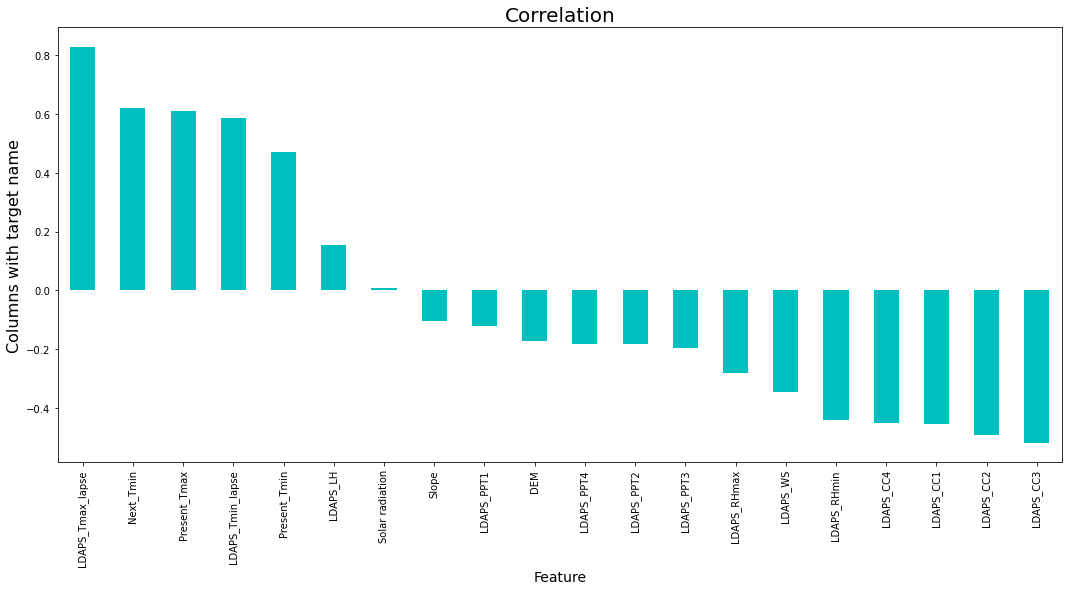

In [50]:
plt.figure(figsize=(18,8))
tp.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

1.There is a strong correltion between of LDAPS_Tmax_lapse and Present_Tmax. 
2.LDAPS_Tmin_lapse, Present_Tmin, LDAPS_LH and Solar radiation have positive correlation, other features have negative correlation.

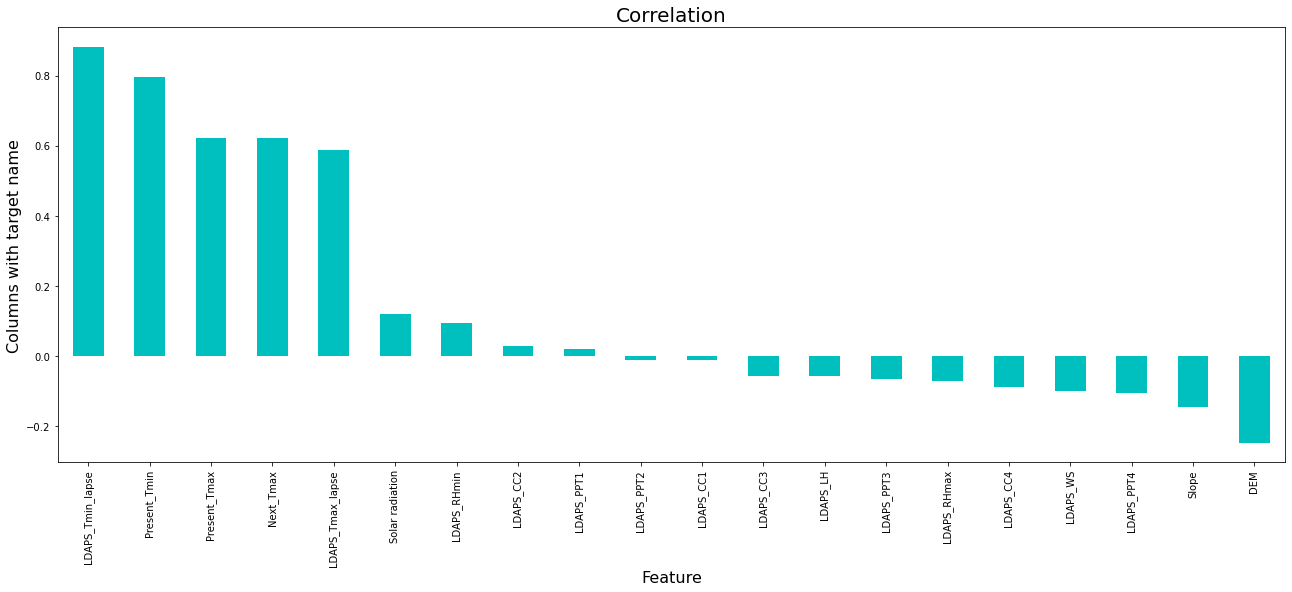

In [51]:
plt.figure(figsize=(22,8))
tp.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=16)
plt.ylabel('Columns with target name', fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()

1. strong correltion between LDAPS_Tmin_lapse, Present_Tmin
2. Present_Tmax, LDAPS_Tmax_lapse, Present_Tmin, LDAPS_LH, LDAPS_CC2, LDAPS_PPT1 , and Solar radiation have positive correlation, others have negative correlation.

Checking Outliers

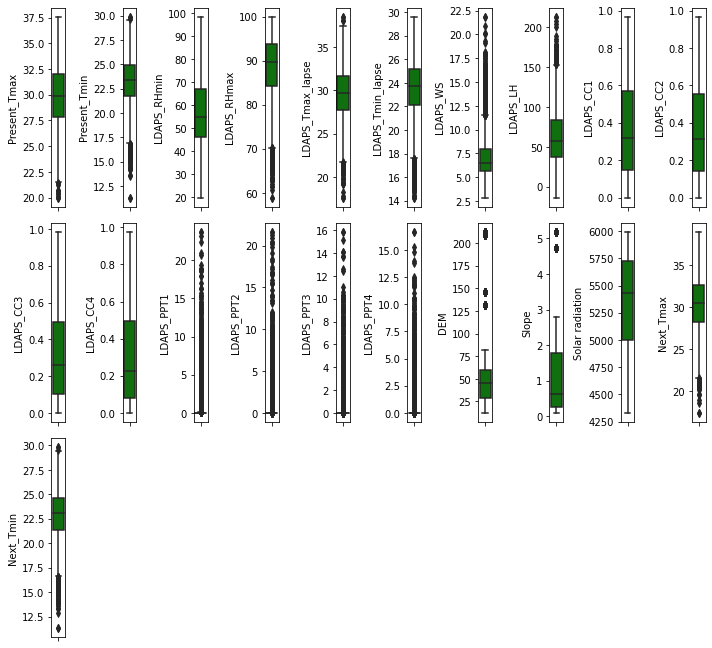

In [52]:
colist=tp.columns.values
ncol= 10
nrows= 10
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(colist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=tp[colist[i]],color='green', orient='x')
    plt.tight_layout()

Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS LDAPS_LH, LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, and LDAPS_CC4 having many outliers. 
Hence removing them

Removing Outliers

In [53]:
from scipy.stats import zscore
a= np.abs(zscore(tp))
a

array([[0.36172509, 0.76016871, 0.10364866, ..., 1.51793488, 0.37652986,
        0.69782911],
       [0.72067506, 0.67693727, 0.30686646, ..., 1.22994952, 0.07184549,
        0.17429753],
       [0.61920005, 0.03053001, 0.55163711, ..., 1.21653443, 0.26400635,
        0.38950571],
       ...,
       [2.22210036, 2.42479758, 2.31620927, ..., 2.0743251 , 0.7928784 ,
        2.22815219],
       [3.30450051, 4.96335662, 2.53120872, ..., 2.35821196, 4.12366669,
        4.68472344],
       [2.64870034, 2.77716765, 2.86236882, ..., 1.51793488, 2.76209758,
        2.76553364]])

Position of Outliers

In [54]:
threshhold = 3
print(np.where(a > 3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 6, 13, 13, ..., 13, 14, 15], dtype=int64))


In [55]:
tp_new=tp[(a<3).all(axis=1)]
print(tp.shape)
print(tp_new.shape)

(7752, 21)
(6894, 21)


In [56]:
Loss_percent=(7752-6894)/7752*100
print(Loss_percent)

11.06811145510836


Since loss% is more than 10%, continuing with original data

In [57]:
tp.skew()

Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

skewness in LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, LDAPS_RHmax, LDAPS_WS and LDAPS_LH

Removing Skewness

In [58]:
from sklearn.preprocessing import power_transform

In [59]:
B=power_transform(tp, method='yeo-johnson')

In [60]:
B= pd.DataFrame(data=B, columns= ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'])

Scaling the data Using StandardScaler.

In [61]:
# Dividing into Feature and Target data
x=B.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
ymax=tp['Next_Tmax']
ymin= tp['Next_Tmin']

In [62]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

d=scaler.fit_transform(x)
x=pd.DataFrame(d,columns=x.columns)

In [63]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [65]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.827466
1       Present_Tmin   44.449922
2        LDAPS_RHmin   59.950102
3        LDAPS_RHmax   17.287826
4   LDAPS_Tmax_lapse   59.483051
5   LDAPS_Tmin_lapse   57.120538
6           LDAPS_WS   19.034263
7           LDAPS_LH   59.546094
8          LDAPS_CC1   17.910615
9          LDAPS_CC2   20.309537
10         LDAPS_CC3   17.526463
11         LDAPS_CC4    9.723241
12        LDAPS_PPT1    2.941523
13        LDAPS_PPT2    2.663910
14        LDAPS_PPT3    2.205350
15        LDAPS_PPT4    2.132337
16               DEM   13.267132
17             Slope    8.516408
18   Solar radiation    5.545723

few columns having higher VIF.Lets drop one by one and check at every step.

In [66]:
x.drop(['LDAPS_RHmin'],axis=1, inplace= True)

In [67]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   25.047381
1       Present_Tmin   44.053799
2        LDAPS_RHmax   13.966267
3   LDAPS_Tmax_lapse   43.308967
4   LDAPS_Tmin_lapse   42.267337
5           LDAPS_WS   18.663838
6           LDAPS_LH   48.401234
7          LDAPS_CC1   17.786326
8          LDAPS_CC2   19.778993
9          LDAPS_CC3   15.991539
10         LDAPS_CC4    9.690095
11        LDAPS_PPT1    2.941486
12        LDAPS_PPT2    2.663137
13        LDAPS_PPT3    2.198450
14        LDAPS_PPT4    2.127218
15               DEM   13.250938
16             Slope    8.494823
17   Solar radiation    5.292753

In [68]:
x.drop(['LDAPS_LH'],axis=1, inplace= True)

In [69]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   22.009314
1       Present_Tmin   43.638648
2        LDAPS_RHmax    9.896363
3   LDAPS_Tmax_lapse   33.384581
4   LDAPS_Tmin_lapse   35.498577
5           LDAPS_WS   16.226480
6          LDAPS_CC1   17.338326
7          LDAPS_CC2   19.709221
8          LDAPS_CC3   15.926216
9          LDAPS_CC4    9.618795
10        LDAPS_PPT1    2.872805
11        LDAPS_PPT2    2.647179
12        LDAPS_PPT3    2.197161
13        LDAPS_PPT4    2.115690
14               DEM   13.123303
15             Slope    8.435583
16   Solar radiation    5.283695

In [70]:
x.drop(['Present_Tmin'],axis=1, inplace= True)

In [71]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   18.243249
1        LDAPS_RHmax    9.224051
2   LDAPS_Tmax_lapse   32.729169
3   LDAPS_Tmin_lapse   29.255799
4           LDAPS_WS   15.671996
5          LDAPS_CC1   17.087160
6          LDAPS_CC2   19.705087
7          LDAPS_CC3   15.924862
8          LDAPS_CC4    9.575833
9         LDAPS_PPT1    2.871436
10        LDAPS_PPT2    2.646866
11        LDAPS_PPT3    2.195655
12        LDAPS_PPT4    2.087196
13               DEM   12.770108
14             Slope    8.402964
15   Solar radiation    5.170875

In [72]:
x.drop(['LDAPS_Tmax_lapse'],axis=1, inplace= True)

In [73]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.387528
1        LDAPS_RHmax    9.032540
2   LDAPS_Tmin_lapse   18.300666
3           LDAPS_WS   14.758883
4          LDAPS_CC1   16.947070
5          LDAPS_CC2   18.696732
6          LDAPS_CC3   15.527766
7          LDAPS_CC4    9.523547
8         LDAPS_PPT1    2.847818
9         LDAPS_PPT2    2.583490
10        LDAPS_PPT3    2.195131
11        LDAPS_PPT4    2.086576
12               DEM   12.463192
13             Slope    8.380505
14   Solar radiation    5.001748

In [74]:
x.drop(['LDAPS_CC2'],axis=1, inplace= True)

In [75]:
calc_vif(x)

variables  VIF FACTOR
0       Present_Tmax   16.367212
1        LDAPS_RHmax    8.905184
2   LDAPS_Tmin_lapse   18.199125
3           LDAPS_WS   14.756111
4          LDAPS_CC1   11.315758
5          LDAPS_CC3   12.959446
6          LDAPS_CC4    9.523513
7         LDAPS_PPT1    2.724140
8         LDAPS_PPT2    2.214950
9         LDAPS_PPT3    2.194886
10        LDAPS_PPT4    2.058092
11               DEM   12.459962
12             Slope    8.378153
13   Solar radiation    4.993929

In [76]:
x.drop(['LDAPS_Tmin_lapse'],axis=1, inplace= True)

In [77]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    6.525007
1       LDAPS_RHmax    8.885355
2          LDAPS_WS   14.694059
3         LDAPS_CC1   10.144945
4         LDAPS_CC3   12.951297
5         LDAPS_CC4    9.517273
6        LDAPS_PPT1    2.661220
7        LDAPS_PPT2    2.212382
8        LDAPS_PPT3    2.194857
9        LDAPS_PPT4    2.013666
10              DEM   12.459748
11            Slope    8.337138
12  Solar radiation    4.953635

In [78]:
x.drop(['LDAPS_WS'],axis=1, inplace= True)

In [79]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.760964
1       LDAPS_RHmax    8.506020
2         LDAPS_CC1    9.570874
3         LDAPS_CC3   12.904517
4         LDAPS_CC4    9.423493
5        LDAPS_PPT1    2.654948
6        LDAPS_PPT2    2.211501
7        LDAPS_PPT3    2.194650
8        LDAPS_PPT4    1.989337
9               DEM   11.880327
10            Slope    8.335969
11  Solar radiation    4.716739

In [80]:
x.drop(['LDAPS_CC3'],axis=1, inplace= True)

In [81]:
calc_vif(x)

variables  VIF FACTOR
0      Present_Tmax    4.709926
1       LDAPS_RHmax    8.501329
2         LDAPS_CC1    8.362328
3         LDAPS_CC4    4.806686
4        LDAPS_PPT1    2.580740
5        LDAPS_PPT2    2.190570
6        LDAPS_PPT3    1.970139
7        LDAPS_PPT4    1.976206
8               DEM   11.876357
9             Slope    8.335862
10  Solar radiation    4.716691

since almost all the colliear data has been removed, lets continue with this data

Building model

In [82]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
# Chosing Best Random State
LR=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymin,random_state= i,test_size=0.20)
    LR.fit(x_train,y_train)
    pred_train= LR.predict(x_train)
    pred_test= LR.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model is performing Well")
        print("Random State", i)
        print("Training Accuracy score is",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is", r2_score(y_test,pred_test)*100)

At Random state  24 The Model is performing Well
Random State 24
Training Accuracy score is 49.980630989610184
Testing Accuracy Score is 49.95838870690673
At Random state  69 The Model is performing Well
Random State 69
Training Accuracy score is 49.98006656112673
Testing Accuracy Score is 49.96883542681376
At Random state  123 The Model is performing Well
Random State 123
Training Accuracy score is 49.98798771287265
Testing Accuracy Score is 49.95420694916023
At Random state  221 The Model is performing Well
Random State 221
Training Accuracy score is 49.97960570739527
Testing Accuracy Score is 49.96315226310066
At Random state  271 The Model is performing Well
Random State 271
Training Accuracy score is 49.96639765298322
Testing Accuracy Score is 49.96953600488359
At Random state  457 The Model is performing Well
Random State 457
Training Accuracy score is 49.98400436023959
Testing Accuracy Score is 49.95627782921195
At Random state  512 The Model is performing Well
Random State 512


In [84]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymin,random_state=730,test_size=0.20)
LR.fit(x_train_b, y_train_b)
LR_pred=LR.predict(x_test_b)
print(r2_score(y_test_b,LR_pred))

0.49980882518549574


Cross Validation of Model

In [85]:
test_accuracy= r2_score(y_test_b,LR_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(LR,x,ymin,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} Cross Value score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 Cross Value score is 32.2000352824476 and Accuracy score is 49.98088251854958
At cross fold 3 Cross Value score is 28.598946596153574 and Accuracy score is 49.98088251854958
At cross fold 4 Cross Value score is 34.36134899439076 and Accuracy score is 49.98088251854958
At cross fold 5 Cross Value score is 31.22404006874568 and Accuracy score is 49.98088251854958
At cross fold 6 Cross Value score is 25.0849280644393 and Accuracy score is 49.98088251854958
At cross fold 7 Cross Value score is 28.47328836076703 and Accuracy score is 49.98088251854958
At cross fold 8 Cross Value score is 28.835209029577115 and Accuracy score is 49.98088251854958
At cross fold 9 Cross Value score is 5.232564039116369 and Accuracy score is 49.98088251854958


At cross fold 4 the Cross Value score is 34.361348994390816 and Accuracy score is 49.68377098184198
DiffErence between both is very high. Hence trying Another models.

In [86]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,LR_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,LR_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,LR_pred)))

Mean Absolute Error: 1.3874195047445155
Mean Squared Error: 3.095911072015181
Root Mean Square Error: 1.7595201254930792


2. Lasso

In [87]:
LS=Lasso()
LS.fit(x_train_b, y_train_b)
LS.score(x_train_b, y_train_b)
LS_pred=LS.predict(x_test_b)

lsd=r2_score(y_test_b, LS_pred)
print('R2 score is:', lsd*100)

rdscore= cross_val_score(LS,x,ymin,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross value Score is:', lsc*100) 

R2 score is: -0.07227224685255607
Cross value Score is: -13.067561296868346


In [88]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,LS_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,LS_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,LS_pred)))

Mean Absolute Error: 1.9571028715548988
Mean Squared Error: 6.1939288666107135
Root Mean Square Error: 2.4887605080864477


3. Ridge

In [89]:
RG= Ridge()
RG.fit(x_train_b, y_train_b)
RG.score(x_train_b, y_train_b)
RG_pred= RG.predict(x_test_b)

rds=r2_score(y_test_b, RG_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(RG,x,ymin,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross value Score is', rdcv*100)

r2 score:  49.97298740041815
Cross value Score is 34.35267406716228


In [90]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,RG_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,RG_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,RG_pred)))

Mean Absolute Error: 1.387466649282627
Mean Squared Error: 3.096399736847123
Root Mean Square Error: 1.759658983112104


In [91]:
#here as well the score is high, hence trying another model

In [93]:
#Decision TreeRegressor
DT=DecisionTreeRegressor()
DT.fit(x_train_b, y_train_b)
DT.score(x_train_b, y_train_b)
DT_pred=DT.predict(x_test_b)

DT_score=r2_score(y_test_b, DT_pred)
print('R2 Score:', DT_score*100)

DTcvscore=cross_val_score(DT,x,ymin,cv=4,scoring='r2')
DTcv=DTcvscore.mean()
print('Cross Value Score is:', DTcv*100)

R2 Score: 63.20086666448255
Cross Value Score is: 3.4061043502976425


In [94]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,DT_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,DT_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,DT_pred)))

Mean Absolute Error: 1.0493874919406834
Mean Squared Error: 2.277666021921341
Root Mean Square Error: 1.5091938317927691


cross validation score is very less, model performance is poor

In [95]:
#KNeighborsRegressor
KN=KNeighborsRegressor()
KN.fit(x_train_b, y_train_b)
KN.score(x_train_b,y_train_b)
KN_pred=KN.predict(x_test_b)

KN_score= r2_score(y_test_b, KN_pred)
print('R2 Score:', KN_score*100)

KN_cvscore=cross_val_score(KN,x,ymin, cv=4, scoring='r2')
cv_mean=KN_cvscore.mean()
print('Cross value Score :',cv_mean*100 )

R2 Score: 74.0261198832138
Cross value Score : 12.105820977006374


In [96]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,KN_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,KN_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,KN_pred)))

Mean Absolute Error: 0.9577176015473888
Mean Squared Error: 1.6076417794970985
Root Mean Square Error: 1.2679281444534223


Scores have huge differences. Trying another model

In [97]:
#Ensemble Techniques
RF=RandomForestRegressor()
RF.fit(x_train_b, y_train_b)
RF.score(x_train_b,y_train_b)
RF_pred=RF.predict(x_test_b)

RF_score= r2_score(y_test_b, RF_pred)
print('R2 score is:', RF_score*100)

RFcv=cross_val_score(RF,x,ymin, cv=4, scoring='r2')
RFcvscore=RFcv.mean()
print('Cross value Score is :',RFcvscore*100 )

R2 score is: 83.45159067910546
Cross value Score is : 35.560833473958695


In [98]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,RF_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,RF_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,RF_pred)))

Mean Absolute Error: 0.7394635718891042
Mean Squared Error: 1.0242564487427466
Root Mean Square Error: 1.0120555561542788


In [99]:
#same result as previous model, huge differences. Trying another model 

In [100]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train_b, y_train_b)
GB.score(x_train_b,y_train_b)
GB_pred=GB.predict(x_test_b)

GB_score= r2_score(y_test_b, GB_pred)
print('R2 score is:', GB_score*100)

GBcv=cross_val_score(GB,x,ymin, cv=4, scoring='r2')
GBcvscore=GBcv.mean()
print('Cross value Score is :',GBcvscore*100 )

R2 score is: 73.89045264970122
Cross value Score is : 43.903275565168606


In [101]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,GB_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,GB_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,GB_pred)))

Mean Absolute Error: 0.9754351904317587
Mean Squared Error: 1.6160388426899266
Root Mean Square Error: 1.2712351641965882


In [102]:
#Huge differences again. Ridge and linear model performing better

In [103]:
#trying Hyper Parameter Tuning on Ridge,GradientBoostingRegressor
# Hyperparameter tunning with Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'max_iter': [500,1000,1500,2000, 2500], 'selection':['cyclic',' random']}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'random_state': 0, 'selection': 'cyclic'}


In [104]:
ls=Lasso(alpha=0.001,max_iter=500, random_state=0, selection='cyclic')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymin,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 49.938860366554636
Cross val Score : 34.41188427734936


In [105]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [109]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymin, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross value Score :',gbcvscore*100 )

R2 score: 73.45782931067237
Cross value Score : 44.43234470318233


In [ ]:
#R2 score: 73.45782931067237 and Cross value Score : 44.43234470318233.. lasso is still the best model

Applying model for Tmax

In [110]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,ymax,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "Model is performing Well")
        print("At Random State", i)
        print("Training Accuracy score is ",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is ", r2_score(y_test,pred_test)*100)

At Random state  55 Model is performing Well
At Random State 55
Training Accuracy score is  55.33406247637108
Testing Accuracy Score is  55.32201939804171
At Random state  71 Model is performing Well
At Random State 71
Training Accuracy score is  55.32004151967762
Testing Accuracy Score is  55.29814430956898
At Random state  87 Model is performing Well
At Random State 87
Training Accuracy score is  55.34546267203516
Testing Accuracy Score is  55.32408121522169
At Random state  121 Model is performing Well
At Random State 121
Training Accuracy score is  55.32615997222086
Testing Accuracy Score is  55.324944189525695
At Random state  146 Model is performing Well
At Random State 146
Training Accuracy score is  55.327825512302844
Testing Accuracy Score is  55.32307111783774
At Random state  164 Model is performing Well
At Random State 164
Training Accuracy score is  55.31233933763387
Testing Accuracy Score is  55.34015760104748
At Random state  199 Model is performing Well
At Random State 

At Random Stat 609 we are getting very less diffrence in training and testing accuracy.

In [111]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,ymax,random_state=948,test_size=0.20)

In [112]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.5533706254663344


In [113]:
#Cross Validation of Model
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,ymax,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 39.30344097014055 and Accuracy score is 55.33706254663344
At cross fold 3 the Cross Val score is 46.80145675960844 and Accuracy score is 55.33706254663344
At cross fold 4 the Cross Val score is 45.608498581335446 and Accuracy score is 55.33706254663344
At cross fold 5 the Cross Val score is 45.78724894172767 and Accuracy score is 55.33706254663344
At cross fold 6 the Cross Val score is 44.825705064435354 and Accuracy score is 55.33706254663344
At cross fold 7 the Cross Val score is 44.26478781937722 and Accuracy score is 55.33706254663344
At cross fold 8 the Cross Val score is 42.36238848824788 and Accuracy score is 55.33706254663344
At cross fold 9 the Cross Val score is 30.502371745194818 and Accuracy score is 55.33706254663344


At cross fold 3 the Cross Val score is 46.80145675960843 and Accuracy score is 55.67482378632032
Both the score having less difference, model performing good compared to other. Trying other model.

In [114]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Mean Absolute Error: 1.6293918573291506
Mean Squared Error: 4.385625332409362
Root Mean Square Error: 2.0941884663060684


In [115]:
#Lasso

ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,ymax,cv=3,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: -0.030113307369461495
Cross val Score : -5.1904906422113095


In [116]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Mean Absolute Error: 2.567981766215407
Mean Squared Error: 9.822340937217307
Root Mean Square Error: 3.134061412483378


Model performance is low.

In [117]:
#Ridge
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.356096172596935
Cross val Score 46.79985538631477


In [118]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Mean Absolute Error: 1.6291665786308824
Mean Squared Error: 4.383756347587659
Root Mean Square Error: 2.0937421874690445


both the scores are good and have very less differences, score is similar to linear model.trying another model.

In [119]:
#DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,ymax,cv=3,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 70.28233588741509
Cross Val Score: 8.685725318699411


In [120]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Mean Absolute Error: 1.1470019342359767
Mean Squared Error: 2.918091553836235
Root Mean Square Error: 1.7082422409705935


poor performance. Trying another

In [121]:
#KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,ymax, cv=3, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 74.0641843540368
Cross val Score : 24.923357359212424


In [122]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Mean Absolute Error: 1.2155254674403613
Mean Squared Error: 2.546737330754352
Root Mean Square Error: 1.5958500339174582


poor performance. Trying another

In [123]:
#Ensemble Techniques
rf=RandomForestRegressor()
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,ymax, cv=3, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 86.93874338243474
Cross val Score : 43.85486033191719


In [124]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Mean Absolute Error: 0.8245628626692456
Mean Squared Error: 1.2825349419729202
Root Mean Square Error: 1.1324905924434516


Huge difference in both the scores. Ridge and linear models are still looking better.

In [125]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.93874338243474
Cross val Score : 48.88590939467948


In [126]:
print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Mean Absolute Error: 0.8245628626692456
Mean Squared Error: 1.2825349419729202
Root Mean Square Error: 1.1324905924434516


In [127]:
#same result as Ensemble Techniques. 

In [128]:
#trying Hyper Parameter Tuning on Ridge and GradientBoostingRegressor
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [129]:
rd= Ridge(alpha= 0.001, copy_X= True, fit_intercept= True, normalize= True, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,ymax,cv=3)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  55.34019449428218
Cross val Score 46.808965903282534


Both the scores are almost same as earlier. Linear Model still working good.

In [131]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [132]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,ymax, cv=3, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.93874338243474
Cross val Score : 47.967887651477795


#Finally, linear model is performing well for Tmax. Hence saving the model

Model for Tmin

In [133]:
import pickle
filename='Temperature Forecast Project using ML_lsmin.pkl'
pickle.dump(ls,open(filename,'wb'))

In [134]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(ls.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.286551
1         32.6  30.286551
2         30.5  30.286551
3         31.6  30.286551
4         29.7  30.286551
...        ...        ...
1546      28.6  30.286551
1547      25.4  30.286551
1548      27.6  30.286551
1549      32.3  30.286551
1550      29.2  30.286551

[1551 rows x 2 columns]

Model for TMax

In [135]:
import pickle
filename='Temperature Forecast Project using ML_lrMax.pkl'
pickle.dump(lr,open(filename,'wb'))

In [136]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(lr.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

original  predicted
0         32.8  30.173872
1         32.6  33.275172
2         30.5  30.239947
3         31.6  32.830702
4         29.7  31.648675
...        ...        ...
1546      28.6  34.231935
1547      25.4  28.893476
1548      27.6  29.087668
1549      32.3  31.041835
1550      29.2  28.837300

[1551 rows x 2 columns]